# Imports

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from enum import Enum
from enum import auto

import os

In [127]:
#show tables
display_analysis = False

#extract mfcc values (test)
flag_extract_mfcc = False

In [128]:
class MyEnum(Enum):
    ITALIAN = auto()
    MDVR = auto()
    AH = auto()
    CZECH = auto()

selected_option = MyEnum.AH

In [129]:
if selected_option == MyEnum.ITALIAN:
    dataset = "italian"
if selected_option == MyEnum.MDVR:
    dataset = "mdvr"
if selected_option == MyEnum.AH:
    dataset = "ah"
if selected_option == MyEnum.CZECH:
    dataset = "czech"

In [130]:
#load features
original_features_path = os.path.join("../data/tables/", dataset + "_original_features.csv")
original_features_df = pd.read_csv(original_features_path)
features_df = original_features_df

In [131]:
features_df.head()

,Duration,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
0,2.436125,202.418257,4.028076,21.846484,0.003272,0.000016,0.001604,0.001702,0.004813,0.041454,0.370998,0.018839,0.022771,0.034516,0.056517,1.0
1,4.131125,125.706456,1.783216,14.863410,0.007464,0.000059,0.004151,0.004911,0.012454,0.091051,0.871526,0.046092,0.057622,0.083584,0.138277,1.0
2,2.475000,177.049692,1.558475,22.143946,0.002866,0.000016,0.001593,0.001697,0.004778,0.039588,0.347629,0.020958,0.025092,0.035070,0.062874,1.0
3,6.915875,225.709821,4.043478,22.572758,0.003098,0.000014,0.001551,0.001639,0.004652,0.046068,0.409546,0.023875,0.028971,0.033667,0.071624,1.0
4,2.453250,170.984519,6.871477,13.131063,0.009406,0.000055,0.004948,0.005529,0.014845,0.112624,0.974763,0.054623,0.070831,0.102388,0.163870,1.0


# Data Exploration

In [132]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Duration             79 non-null     float64
 1   meanF0               79 non-null     float64
 2   stdevF0              79 non-null     float64
 3   hnr                  79 non-null     float64
 4   localJitter          79 non-null     float64
 5   localabsoluteJitter  79 non-null     float64
 6   rapJitter            79 non-null     float64
 7   ppq5Jitter           79 non-null     float64
 8   ddpJitter            79 non-null     float64
 9   localShimmer         79 non-null     float64
 10  localdbShimmer       79 non-null     float64
 11  apq3Shimmer          79 non-null     float64
 12  aqpq5Shimmer         79 non-null     float64
 13  apq11Shimmer         79 non-null     float64
 14  ddaShimmer           79 non-null     float64
 15  PD                   79 non-null     float

drop N/A rows

In [133]:
features_df.dropna(subset=['meanF0'], inplace=True)
features_df.dropna(subset=['stdevF0'], inplace=True)
features_df.dropna(subset=['hnr'], inplace=True)
features_df.dropna(subset=['localJitter'], inplace=True)
features_df.dropna(subset=['localabsoluteJitter'], inplace=True)
features_df.dropna(subset=['rapJitter'], inplace=True)
features_df.dropna(subset=['ppq5Jitter'], inplace=True)
features_df.dropna(subset=['ddpJitter'], inplace=True)
features_df.dropna(subset=['localShimmer'], inplace=True)
features_df.dropna(subset=['localdbShimmer'], inplace=True)
features_df.dropna(subset=['apq3Shimmer'], inplace=True)
features_df.dropna(subset=['aqpq5Shimmer'], inplace=True)
features_df.dropna(subset=['apq11Shimmer'], inplace=True)
features_df.dropna(subset=['ddaShimmer'], inplace=True)
if flag_extract_mfcc:
    features_df.dropna(subset=['mfcc0'], inplace=True)
    features_df.dropna(subset=['mfcc1'], inplace=True)
    features_df.dropna(subset=['mfcc2'], inplace=True)
    features_df.dropna(subset=['mfcc3'], inplace=True)
    features_df.dropna(subset=['mfcc4'], inplace=True)
    features_df.dropna(subset=['mfcc5'], inplace=True)
    features_df.dropna(subset=['mfcc6'], inplace=True)
    features_df.dropna(subset=['mfcc7'], inplace=True)
    features_df.dropna(subset=['mfcc8'], inplace=True)
    features_df.dropna(subset=['mfcc9'], inplace=True)
    features_df.dropna(subset=['mfcc10'], inplace=True)
    features_df.dropna(subset=['mfcc11'], inplace=True)
    features_df.dropna(subset=['mfcc12'], inplace=True)
    features_df.dropna(subset=['PD'], inplace=True)
    features_df.dropna(subset=['PD'], inplace=True)

features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Duration             79 non-null     float64
 1   meanF0               79 non-null     float64
 2   stdevF0              79 non-null     float64
 3   hnr                  79 non-null     float64
 4   localJitter          79 non-null     float64
 5   localabsoluteJitter  79 non-null     float64
 6   rapJitter            79 non-null     float64
 7   ppq5Jitter           79 non-null     float64
 8   ddpJitter            79 non-null     float64
 9   localShimmer         79 non-null     float64
 10  localdbShimmer       79 non-null     float64
 11  apq3Shimmer          79 non-null     float64
 12  aqpq5Shimmer         79 non-null     float64
 13  apq11Shimmer         79 non-null     float64
 14  ddaShimmer           79 non-null     float64
 15  PD                   79 non-null     float

All types are consistent and no null values

In [134]:
def display_boxplots():
    plt.figure(figsize= (20,15))
    plt.subplot(5,5,1)
    sns.boxplot(features_df["meanF0"],orient="v", color='lightblue')
    plt.xlabel('meanF0')

    plt.subplot(5,5,2)
    sns.boxplot(features_df["stdevF0"],orient="v", color='lightblue')
    plt.xlabel('stdevF0')

    plt.subplot(5,5,3)
    sns.boxplot(features_df["hnr"],orient="v", color='lightblue')
    plt.xlabel('hnr')

    plt.subplot(5,5,4)
    sns.boxplot(features_df["localJitter"],orient="v", color='lightblue')
    plt.xlabel('localJitter')

    plt.subplot(5,5,5)
    sns.boxplot(features_df["localabsoluteJitter"],orient="v", color='lightblue')
    plt.xlabel('localabsoluteJitter')

    plt.subplot(5,5,6)
    sns.boxplot(features_df["rapJitter"],orient="v", color='lightblue')
    plt.xlabel('rapJitter')

    plt.subplot(5,5,7)
    sns.boxplot(features_df["ppq5Jitter"],orient="v", color='lightblue')
    plt.xlabel('ppq5Jitter')

    plt.subplot(5,5,8)
    sns.boxplot(features_df["ddpJitter"],orient="v", color='lightblue')
    plt.xlabel('ddpJitter')

    plt.subplot(5,5,9)
    sns.boxplot(features_df["localShimmer"],orient="v", color='lightblue')
    plt.xlabel('localShimmer')

    plt.subplot(5,5,10)
    sns.boxplot(features_df["localdbShimmer"],orient="v", color='lightblue')
    plt.xlabel('localdbShimmer')

    plt.subplot(5,5,11)
    sns.boxplot(features_df["apq3Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq3Shimmer')

    plt.subplot(5,5,12)
    sns.boxplot(features_df["aqpq5Shimmer"],orient="v", color='lightblue')
    plt.xlabel('aqpq5Shimmer')

    plt.subplot(5,5,13)
    sns.boxplot(features_df["apq11Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq11Shimmer')

    plt.subplot(5,5,14)
    sns.boxplot(features_df["ddaShimmer"],orient="v", color='lightblue')
    plt.xlabel('ddaShimmer')


if display_analysis:
    display_boxplots()


Some outliers, mostly above the plots

In [135]:
def get_kdeplots():
    plt.figure(figsize=(20, 15))
    plt.subplot(5,5,1)
    sns.kdeplot(features_df["meanF0"], color='lightblue')
    plt.xlabel('meanF0')

    plt.subplot(5,5,2)
    sns.kdeplot(features_df["stdevF0"], color='lightblue')
    plt.xlabel('stdevF0')

    plt.subplot(5,5,3)
    sns.kdeplot(features_df["hnr"],color='lightblue')
    plt.xlabel('hnr')

    plt.subplot(5,5,4)
    sns.kdeplot(features_df["localJitter"],color='lightblue')
    plt.xlabel('localJitter')

    plt.subplot(5,5,5)
    sns.kdeplot(features_df["localabsoluteJitter"],color='lightblue')
    plt.xlabel('localabsoluteJitter')

    plt.subplot(5,5,6)
    sns.kdeplot(features_df["rapJitter"],color='lightblue')
    plt.xlabel('rapJitter')

    plt.subplot(5,5,7)
    sns.kdeplot(features_df["ppq5Jitter"],color='lightblue')
    plt.xlabel('ppq5Jitter')

    plt.subplot(5,5,8)
    sns.kdeplot(features_df["ddpJitter"],color='lightblue')
    plt.xlabel('ddpJitter')

    plt.subplot(5,5,9)
    sns.kdeplot(features_df["localShimmer"],color='lightblue')
    plt.xlabel('localShimmer')

    plt.subplot(5,5,10)
    sns.kdeplot(features_df["localdbShimmer"],color='lightblue')
    plt.xlabel('localdbShimmer')

    plt.subplot(5,5,11)
    sns.kdeplot(features_df["apq3Shimmer"],color='lightblue')
    plt.xlabel('apq3Shimmer')

    plt.subplot(5,5,12)
    sns.kdeplot(features_df["aqpq5Shimmer"],color='lightblue')
    plt.xlabel('aqpq5Shimmer')

    plt.subplot(5,5,13)
    sns.kdeplot(features_df["apq11Shimmer"],color='lightblue')
    plt.xlabel('apq11Shimmer')

    plt.subplot(5,5,14)
    sns.kdeplot(features_df["ddaShimmer"],color='lightblue')
    plt.xlabel('ddaShimmer')

if display_analysis:
    get_kdeplots()


In [136]:
features_df.skew()

Duration               0.882295
meanF0                 0.215790
stdevF0                2.586195
hnr                   -0.544186
localJitter            1.649580
localabsoluteJitter    1.797470
rapJitter              1.619291
ppq5Jitter             1.708965
ddpJitter              1.619291
localShimmer           1.167309
localdbShimmer         1.000449
apq3Shimmer            1.094436
aqpq5Shimmer           1.197304
apq11Shimmer           1.241349
ddaShimmer             1.094436
PD                     0.025811
dtype: float64

# Bivariate analysis

In [137]:
if display_analysis:
    sns.pairplot(features_df)  #pairplot
    plt.show()

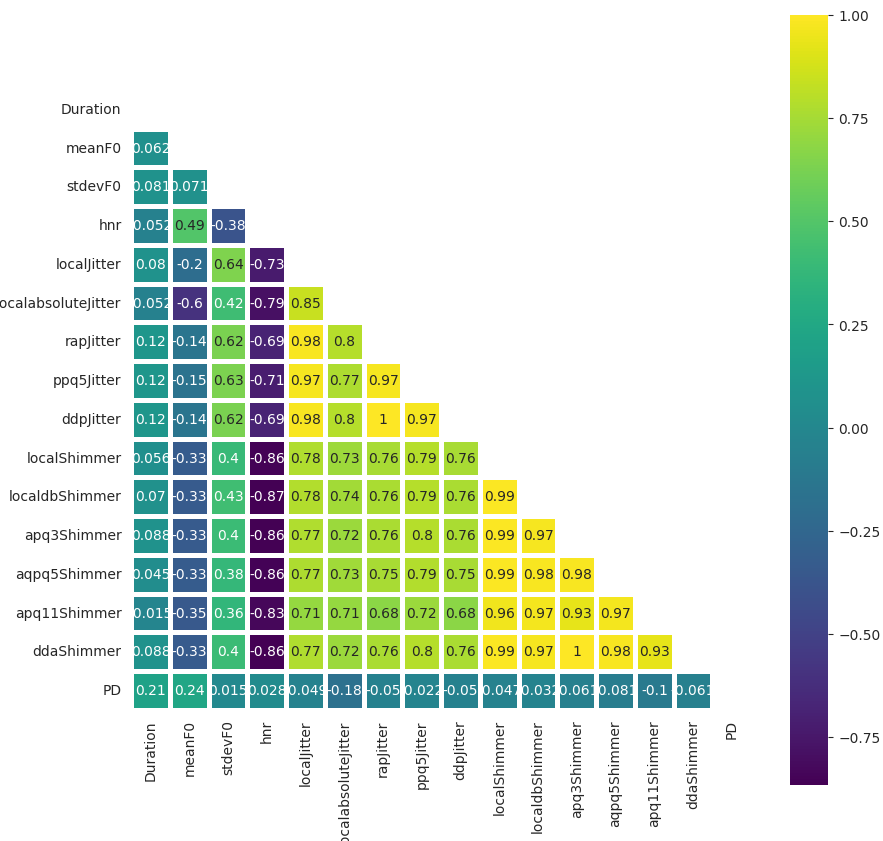

In [138]:
correlation = original_features_df.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(correlation,mask=mask,square=True,linewidths=2.5,cmap="viridis",annot=True)

(16.5, -0.5)

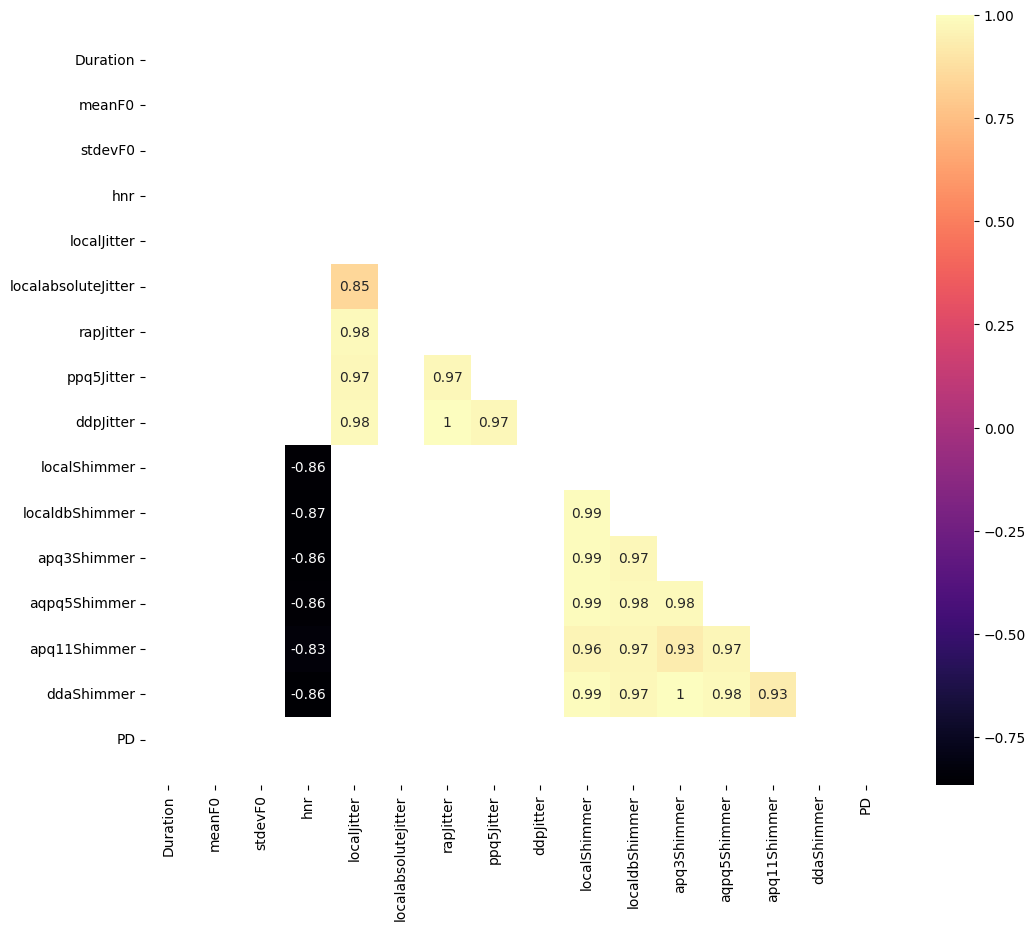

In [139]:
plt.figure(figsize=(12, 10))
df_corr = original_features_df.corr(method='pearson')
matrix = np.triu(df_corr)
ax = sns.heatmap(df_corr[(df_corr >= 0.80) | (df_corr <= -0.80)], annot=True, cmap='magma', mask=matrix)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [140]:
print("number of parkinson people in the dataset ",len(features_df.loc[features_df["PD"]==1]))
print("number of Healthy people in the dataset ",len(features_df.loc[features_df["PD"]==0]))

number of parkinson people in the dataset  39
number of Healthy people in the dataset  40


# Pre-processing

In [141]:
features_df

,Duration,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
0,2.436125,202.418257,4.028076,21.846484,0.003272,0.000016,0.001604,0.001702,0.004813,0.041454,0.370998,0.018839,0.022771,0.034516,0.056517,1.0
1,4.131125,125.706456,1.783216,14.863410,0.007464,0.000059,0.004151,0.004911,0.012454,0.091051,0.871526,0.046092,0.057622,0.083584,0.138277,1.0
2,2.475000,177.049692,1.558475,22.143946,0.002866,0.000016,0.001593,0.001697,0.004778,0.039588,0.347629,0.020958,0.025092,0.035070,0.062874,1.0
3,6.915875,225.709821,4.043478,22.572758,0.003098,0.000014,0.001551,0.001639,0.004652,0.046068,0.409546,0.023875,0.028971,0.033667,0.071624,1.0
4,2.453250,170.984519,6.871477,13.131063,0.009406,0.000055,0.004948,0.005529,0.014845,0.112624,0.974763,0.054623,0.070831,0.102388,0.163870,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2.628375,188.177822,1.823544,17.637116,0.005370,0.000029,0.003217,0.003109,0.009651,0.057343,0.491821,0.031497,0.037817,0.047255,0.094492,0.0
75,1.698250,146.479452,2.660492,21.440516,0.003394,0.000023,0.001615,0.001824,0.004844,0.061219,0.534155,0.032286,0.043249,0.058343,0.096857,0.0
76,5.763625,198.015728,28.827923,18.466989,0.007650,0.000039,0.004569,0.004642,0.013707,0.081673,0.742056,0.045144,0.052651,0.061131,0.135432,0.0
77,2.053875,92.386873,27.049161,14.546244,0.008994,0.000098,0.004278,0.005338,0.012835,0.065914,0.617919,0.030740,0.038430,0.063122,0.092221,0.0


In [142]:
features_df.drop('Duration', axis=1, inplace=True)

Drop the "Duration" column.

### Outlier treatment

In [143]:
def outliar_treatment(df):
    '''
    Any values greater than the whisker (3IQ) are set to the whisker value, 
    and any values lower than the LowerBound (1IQ) are set to the LowerBound.
    '''
    cols = list(df.columns)
    cols.remove('PD')
    for columnName in cols:
        Q1 = df[columnName].quantile(0.25)
        Q3 = df[columnName].quantile(0.75)
        IQR = Q3 - Q1
        whisker = Q1 + 1.5 * IQR
        LowerBound = Q1- 1.5 * IQR
        df[columnName] = df[columnName].apply(lambda x : whisker if x>whisker else x)
        df[columnName] = df[columnName].apply(lambda x : LowerBound if x<LowerBound else x)
    return df

In [144]:
removed_outliers = outliar_treatment(features_df)


In [145]:
def show_box_plots():
    plt.figure(figsize= (20,15))
    plt.subplot(5,5,1)
    sns.boxplot(removed_outliers["meanF0"],orient="v", color='lightblue')
    plt.xlabel('meanF0')

    plt.subplot(5,5,2)
    sns.boxplot(removed_outliers["stdevF0"],orient="v", color='lightblue')
    plt.xlabel('stdevF0')

    plt.subplot(5,5,3)
    sns.boxplot(removed_outliers["hnr"],orient="v", color='lightblue')
    plt.xlabel('hnr')

    plt.subplot(5,5,4)
    sns.boxplot(removed_outliers["localJitter"],orient="v", color='lightblue')
    plt.xlabel('localJitter')

    plt.subplot(5,5,5)
    sns.boxplot(removed_outliers["localabsoluteJitter"],orient="v", color='lightblue')
    plt.xlabel('localabsoluteJitter')

    plt.subplot(5,5,6)
    sns.boxplot(removed_outliers["rapJitter"],orient="v", color='lightblue')
    plt.xlabel('rapJitter')

    plt.subplot(5,5,7)
    sns.boxplot(removed_outliers["ppq5Jitter"],orient="v", color='lightblue')
    plt.xlabel('ppq5Jitter')

    plt.subplot(5,5,8)
    sns.boxplot(removed_outliers["ddpJitter"],orient="v", color='lightblue')
    plt.xlabel('ddpJitter')

    plt.subplot(5,5,9)
    sns.boxplot(removed_outliers["localShimmer"],orient="v", color='lightblue')
    plt.xlabel('localShimmer')

    plt.subplot(5,5,10)
    sns.boxplot(removed_outliers["localdbShimmer"],orient="v", color='lightblue')
    plt.xlabel('localdbShimmer')

    plt.subplot(5,5,11)
    sns.boxplot(removed_outliers["apq3Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq3Shimmer')

    plt.subplot(5,5,12)
    sns.boxplot(removed_outliers["aqpq5Shimmer"],orient="v", color='lightblue')
    plt.xlabel('aqpq5Shimmer')

    plt.subplot(5,5,13)
    sns.boxplot(removed_outliers["apq11Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq11Shimmer')

    plt.subplot(5,5,14)
    sns.boxplot(removed_outliers["ddaShimmer"],orient="v", color='lightblue')
    plt.xlabel('ddaShimmer')

if display_analysis:
    show_box_plots()


In [146]:
if display_analysis:
    get_kdeplots()

In [147]:
features_df.skew()

meanF0                -0.122349
stdevF0                0.772846
hnr                   -0.544186
localJitter            0.432091
localabsoluteJitter    0.489298
rapJitter              0.458296
ppq5Jitter             0.506619
ddpJitter              0.458296
localShimmer           0.549244
localdbShimmer         0.401233
apq3Shimmer            0.564790
aqpq5Shimmer           0.441516
apq11Shimmer           0.394605
ddaShimmer             0.564790
PD                     0.025811
dtype: float64

### checking and removing multi-colinearity

As displayed in the heatmap before, certain independent attributes have high correlations. Multicollinearity can be a problem for us, because we could not be able to determine the effects of each independent variables on the dependent variable.

We can compute the Variable Inflation Factors (VIF) score for each independent variable. It represents how well the variable can be explained by others. We can try to remove variables with high VIF scores in order to reduce multicollinearity.

In [148]:
reduced_features_df = removed_outliers.copy() #create a copy to perform the trials

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(reduced_features_df,2))

/Users/tomas/Documents/Tese/Predictive-models-Parkinson/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,meanF0,28.095404
1,stdevF0,5.848582
2,hnr,24.911062
3,localJitter,4.803615
4,localabsoluteJitter,NaN
5,rapJitter,5.469050
6,ppq5Jitter,5.491655
7,ddpJitter,12.781086
8,localShimmer,339.703148
9,localdbShimmer,476.369675


(no VIF reduction applied)

In [149]:
# reduced_features_df=reduced_features_df.drop(['rapJitter','localabsoluteJitter','ppq5Jitter'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [150]:
#  reduced_features_df=reduced_features_df.drop(['ddaShimmer'],axis=1)
#  calc_vif(round(reduced_features_df,2))

In [151]:
#  reduced_features_df=reduced_features_df.drop(['localdbShimmer'],axis=1)
#  calc_vif(round(reduced_features_df,2))

In [152]:
#  reduced_features_df=reduced_features_df.drop(['localShimmer'],axis=1)
#  calc_vif(round(reduced_features_df,2))

In [153]:
# reduced_features_df=reduced_features_df.drop(['aqpq5Shimmer'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [154]:
# reduced_features_df=reduced_features_df.drop(['meanF0'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [155]:
# reduced_features_df=reduced_features_df.drop(['apq3Shimmer'],axis=1)
# calc_vif(round(reduced_features_df,2))

We originally removed the variable with the highest VIF iteratively until all variables showed a low enough score (<10) <br>

In [156]:
def runPCA(df):
    #Z-score the Jitter and Shimmer measurements
    features = ['localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
                'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'aqpq5Shimmer', 'apq11Shimmer', 'ddaShimmer']
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    #y = df.loc[:,['target']].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    #PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['JitterPCA', 'ShimmerPCA'])
    principalDf
    return principalDf

# pcaData = runPCA(reduced_features_df)

# reduced_features_df = pd.concat([reduced_features_df.reset_index(drop=True),pcaData.reset_index(drop=True)], axis=1)

# reduced_features_df=reduced_features_df.drop(['localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
#                 'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'aqpq5Shimmer', 'apq11Shimmer', 'ddaShimmer'],axis=1)

PCA reduction not applied

In [157]:
reduced_features_df

,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
0,202.418257,4.028076,21.846484,0.003272,0.000016,0.001604,0.001702,0.004813,0.041454,0.370998,0.018839,0.022771,0.034516,0.056517,1.0
1,125.706456,1.783216,14.863410,0.007464,0.000059,0.004151,0.004911,0.012454,0.091051,0.871526,0.046092,0.057622,0.083584,0.138277,1.0
2,177.049692,1.558475,22.143946,0.002866,0.000016,0.001593,0.001697,0.004778,0.039588,0.347629,0.020958,0.025092,0.035070,0.062874,1.0
3,225.709821,4.043478,22.572758,0.003098,0.000014,0.001551,0.001639,0.004652,0.046068,0.409546,0.023875,0.028971,0.033667,0.071624,1.0
4,170.984519,6.871477,13.131063,0.009406,0.000055,0.004948,0.005529,0.014845,0.112624,0.971279,0.054623,0.069976,0.091028,0.163870,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,188.177822,1.823544,17.637116,0.005370,0.000029,0.003217,0.003109,0.009651,0.057343,0.491821,0.031497,0.037817,0.047255,0.094492,0.0
75,146.479452,2.660492,21.440516,0.003394,0.000023,0.001615,0.001824,0.004844,0.061219,0.534155,0.032286,0.043249,0.058343,0.096857,0.0
76,198.015728,9.235050,18.466989,0.007650,0.000039,0.004569,0.004642,0.013707,0.081673,0.742056,0.045144,0.052651,0.061131,0.135432,0.0
77,92.386873,9.235050,14.546244,0.008994,0.000071,0.004278,0.005338,0.012835,0.065914,0.617919,0.030740,0.038430,0.063122,0.092221,0.0


In [158]:
#reduced_features_df=reduced_features_df.drop(['PD'],axis=1)

In [159]:
features = dataset + '_features.csv'
reduced_features = dataset + '_reduced_features.csv'

outdir = '../data/tables/'
if not os.path.exists(outdir):
    os.mkdir(outdir)

original_features_df.to_csv(os.path.join(outdir, features),index=False)
reduced_features_df.to_csv(os.path.join(outdir, reduced_features),index=False)

Numerical features are standardized and saved to csv files